+ {caret} 패키지 : classification and regression training
  + 복잡한 회귀와 분류 문제에 대한 모형 훈련과 조율 과정을 간소화하는 함수를 포함

### 6.2 사용절차 : PLS 회귀 예제
+ train() 함수

  1) 재표본을 사용하여 모형의 조율모수가 성능에 미치는 영향을 평가하고

  2) 이들 모수에서 최적의 모형을 선택하고
  
  3) 훈련 집합에서 모형 성능을 추정한다

+ createDataPartition() : 훈련용 데이터셋과 검증용 데이터셋으로 나눔

In [1]:
install.packages("caret")
install.packages("mlbench")
library(caret)
library(mlbench)
data(Sonar)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘Rcpp’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: ggplot2

Loading required package: lattice



In [2]:
set.seed(107)
inTrain = createDataPartition(y = Sonar$Class, p = 0.75, list = FALSE)
str(inTrain)

 int [1:157, 1] 1 2 3 4 5 7 10 11 12 13 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr "Resample1"


In [3]:
training = Sonar[inTrain, ]
testing = Sonar[-inTrain, ]
nrow(training)
nrow(testing)

[1] 157

[1] 51

+ train() 함수의 tuneLength = 옵션 : 평가되는 수를 제어
+ train() 함수의 tuneGrid = 옵션 : 특정값이 필요할 때 사용
+ trainControl() 함수의 summaryFunction = 옵션 : 관측값과 예측값을 취하여 성능 측도를 추정하는 함수에서 사용
+ trainControl() 함수의 classProbs = TRUE 옵션 : 통계적 계산을 포함하는 데 사용
  + 이게 없으면 ROC 계산이 이루어지지 않음

In [4]:
set.seed(123)
install.packages("pls")
library(pls)
ctrl = trainControl(method = "repeatedcv", repeats = 3,
                    classProbs = TRUE, summaryFunction = twoClassSummary)
plsFit = train(Class ~ ., data = training, method = "pls", tuneLength = 15,
               trControl = ctrl, metric = "ROC", preProc = c("center", "scale"))
plsFit

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘pls’


The following object is masked from ‘package:caret’:

    R2


The following object is masked from ‘package:stats’:

    loadings




Partial Least Squares 

157 samples
 60 predictor
  2 classes: 'M', 'R' 

Pre-processing: centered (60), scaled (60) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 141, 141, 142, 142, 141, 142, ... 
Resampling results across tuning parameters:

  ncomp  ROC        Sens       Spec     
   1     0.8052910  0.7259259  0.6904762
   2     0.8479084  0.7495370  0.8005952
   3     0.8488426  0.7638889  0.7476190
   4     0.8355241  0.7652778  0.7357143
   5     0.8124173  0.7481481  0.7547619
   6     0.7887566  0.7236111  0.6988095
   7     0.7938161  0.7439815  0.6892857
   8     0.8012235  0.7393519  0.6982143
   9     0.7932126  0.7578704  0.6767857
  10     0.7895916  0.7412037  0.6904762
  11     0.7868386  0.7416667  0.7101190
  12     0.7773479  0.7365741  0.7148810
  13     0.7715608  0.7375000  0.7000000
  14     0.7678902  0.7175926  0.6904762
  15     0.7679729  0.7148148  0.6898810

ROC was used to select the optimal model using the largest val

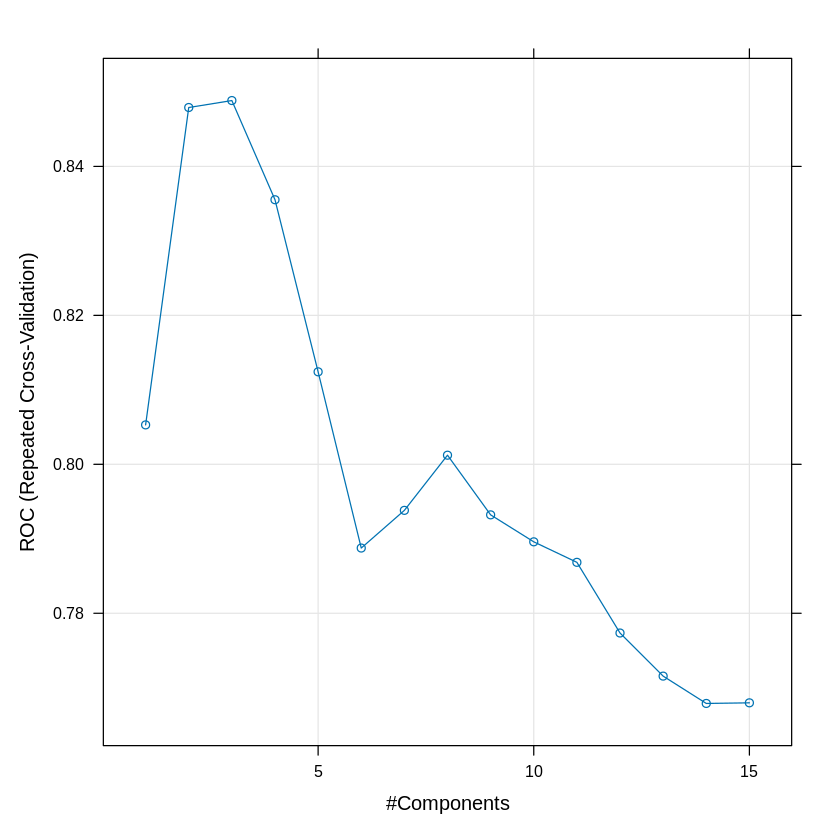

In [5]:
plot(plsFit)

In [6]:
plsClasses = predict(plsFit, newdata = testing)
str(plsClasses)

 Factor w/ 2 levels "M","R": 2 1 1 1 2 2 1 2 2 2 ...


In [7]:
plsProbs = predict(plsFit, newdata = testing, type = "prob")
head(plsProbs)

,M,R
,<dbl>,<dbl>
6,0.2878477,0.7121523
8,0.6484796,0.3515204
9,0.6590434,0.3409566
15,0.5285970,0.4714030
26,0.4299690,0.5700310
27,0.4916393,0.5083607


In [8]:
confusionMatrix(data = plsClasses, testing$Class)

Confusion Matrix and Statistics

          Reference
Prediction  M  R
         M 21  7
         R  6 17
                                          
               Accuracy : 0.7451          
                 95% CI : (0.6037, 0.8567)
    No Information Rate : 0.5294          
    P-Value [Acc > NIR] : 0.001311        
                                          
                  Kappa : 0.4872          
                                          
 Mcnemar's Test P-Value : 1.000000        
                                          
            Sensitivity : 0.7778          
            Specificity : 0.7083          
         Pos Pred Value : 0.7500          
         Neg Pred Value : 0.7391          
             Prevalence : 0.5294          
         Detection Rate : 0.4118          
   Detection Prevalence : 0.5490          
      Balanced Accuracy : 0.7431          
                                          
       'Positive' Class : M               
                                    

+ Cohen의 카파통계량 : 범주형으로 이루어지는 평가에서 두 평가자 간의 일치도의 측도
  + 제안된 분류기의 성능이 각 범주의 빈도에 따라 임의로 예측하는 분류기의 성능보다 얼마나 우수한지를 알려줌
  + 우연에 의한 일치 가능성을 고려하므로 단순 퍼센트보다 로버스트한 측도
  + 정분류율의 평가로 쓰이기도 함

In [9]:
rdaGrid = data.frame(gamma = (0:4) / 4, lambda = 3 / 4)
set.seed(123)
install.packages("klaR")
library(klaR)
rdaFit = train(Class ~ ., data = training, method = "rda",
               tuneGrid = rdaGrid, trControl = ctrl, metric = "ROC")
rdaFit

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘R.methodsS3’, ‘R.oo’, ‘R.utils’, ‘httpuv’, ‘xtable’, ‘sourcetools’, ‘later’, ‘promises’, ‘R.cache’, ‘shiny’, ‘miniUI’, ‘styler’, ‘classInt’, ‘labelled’, ‘combinat’, ‘questionr’


Loading required package: MASS



Regularized Discriminant Analysis 

157 samples
 60 predictor
  2 classes: 'M', 'R' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 141, 141, 142, 142, 141, 142, ... 
Resampling results across tuning parameters:

  gamma  ROC        Sens       Spec     
  0.00   0.7775876  0.7231481  0.6815476
  0.25   0.8865989  0.8643519  0.7863095
  0.50   0.8764964  0.8513889  0.7303571
  0.75   0.8633185  0.8300926  0.7095238
  1.00   0.7338872  0.6800926  0.6357143

Tuning parameter 'lambda' was held constant at a value of 0.75
ROC was used to select the optimal model using the largest value.
The final values used for the model were gamma = 0.25 and lambda = 0.75.

In [10]:
rdaClasses = predict(rdaFit, newdata = testing)
confusionMatrix(rdaClasses, testing$Class)

Confusion Matrix and Statistics

          Reference
Prediction  M  R
         M 25  5
         R  2 19
                                         
               Accuracy : 0.8627         
                 95% CI : (0.7374, 0.943)
    No Information Rate : 0.5294         
    P-Value [Acc > NIR] : 5.008e-07      
                                         
                  Kappa : 0.7226         
                                         
 Mcnemar's Test P-Value : 0.4497         
                                         
            Sensitivity : 0.9259         
            Specificity : 0.7917         
         Pos Pred Value : 0.8333         
         Neg Pred Value : 0.9048         
             Prevalence : 0.5294         
         Detection Rate : 0.4902         
   Detection Prevalence : 0.5882         
      Balanced Accuracy : 0.8588         
                                         
       'Positive' Class : M              
                                         

In [11]:
resamps = resamples(list(pls = plsFit, rda = rdaFit))
summary(resamps)


Call:
summary.resamples(object = resamps)

Models: pls, rda 
Number of resamples: 30 

ROC 
         Min.   1st Qu.    Median      Mean   3rd Qu.     Max. NA's
pls 0.6785714 0.7872024 0.8234127 0.8488426 0.9375000 0.984127    0
rda 0.7500000 0.8470982 0.8888889 0.8865989 0.9404762 1.000000    0

Sens 
         Min.   1st Qu. Median      Mean 3rd Qu. Max. NA's
pls 0.5555556 0.6250000  0.750 0.7638889   0.875    1    0
rda 0.6250000 0.7569444  0.875 0.8643519   1.000    1    0

Spec 
         Min.   1st Qu.    Median      Mean   3rd Qu. Max. NA's
pls 0.4285714 0.7142857 0.7142857 0.7476190 0.8571429    1    0
rda 0.5000000 0.7142857 0.7500000 0.7863095 0.8750000    1    0


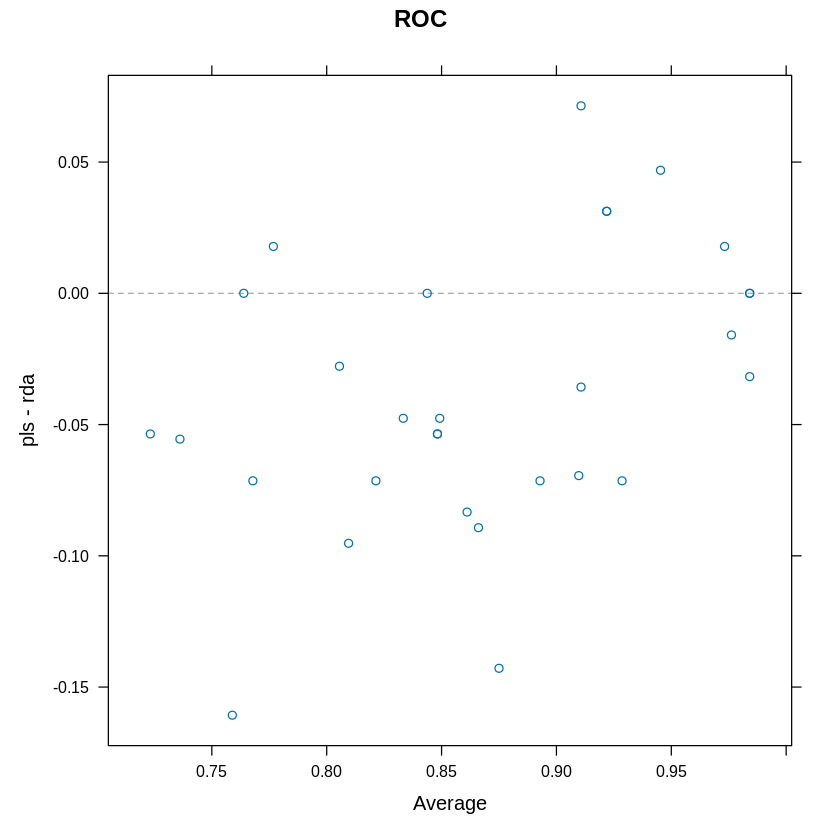

In [12]:
xyplot(resamps, what = "BlandAltman")

In [13]:
diffs = diff(resamps)
summary(diffs)


Call:
summary.diff.resamples(object = diffs)

p-value adjustment: bonferroni 
Upper diagonal: estimates of the difference
Lower diagonal: p-value for H0: difference = 0

ROC 
    pls       rda     
pls           -0.03776
rda 0.0005443         

Sens 
    pls       rda    
pls           -0.1005
rda 0.0001718        

Spec 
    pls    rda     
pls        -0.03869
rda 0.1357         


+ BlandAltman : 서로 다른 두 분석 간의 합치도를 분석하는데 사용되는 데이터 plot 방법
+ bonferroni : 다중비교에서 생길 수 있는 오류 교정방법으로 관측데이터에 대해 $H_0$가 성립할 확률이 낮으면 $H_0$를 기각함으로써 $H_1$ 채택

### 6.4 {caret}을 이용한 변수선택
+ ROC 곡선 분석을 사용하여 추정 가능
+ 모형-기반 접근법의 장점 : 모형 성능과 보다 밀접하게 관계되며 예측변수들 간의 상관구조를 중요도 계산에 결합할 수 있음
+ varImp{caret} 함수 : train 객체 또는 특정 방법에 의한 결과 객체에 대한 변수 중요도를 계산

#### 예제 1.

In [14]:
set.seed(100)
library(mlbench)
library(caret)
data(PimaIndiansDiabetes)

In [15]:
control = trainControl(method = "repeatedcV", number = 10, repeats = 3)
model = train(diabetes ~ ., data = PimaIndiansDiabetes, method = "lvq",
              preProcess = "scale", trControl = control)

importance = varImp(model, scale = FALSE)
print(importance)

Warning message:
“`repeats` has no meaning for this resampling method.”


ROC curve variable importance

         Importance
glucose      0.7881
mass         0.6876
age          0.6869
pregnant     0.6195
pedigree     0.6062
pressure     0.5865
triceps      0.5536
insulin      0.5379


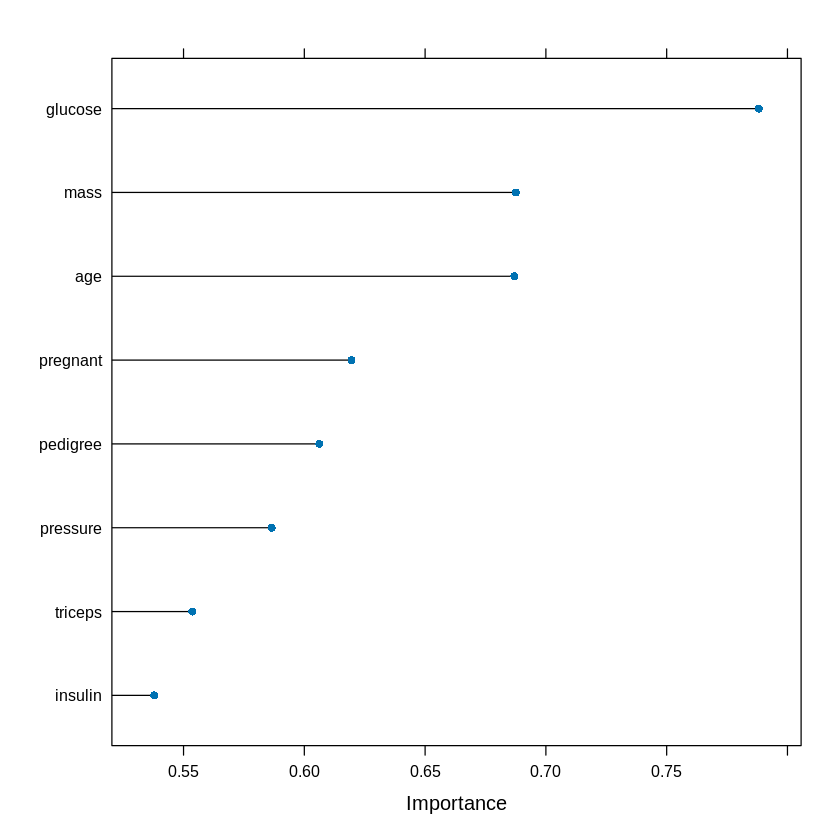

In [16]:
plot(importance)

+ 재귀적 변수제거(=후진선택, RFE) : caret 패키지에서 제공되는 가장 널리 사용되는 자동 변수 선택 방법
+ rfe{caret} 함수 : RFE 알고리즘 수행
#### 예제 2.

In [17]:
set.seed(50)
install.packages("randomForest")
library(mlbench)
library(caret)
library(randomForest)
data(PimaIndiansDiabetes)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin




In [18]:
control = rfeControl(functions = rfFuncs, method = "cv", number = 10)
results = rfe(PimaIndiansDiabetes[, 1:8], PimaIndiansDiabetes[, 9],
              sizes = c(1:8), rfeControl = control)
print(results)


Recursive feature selection

Outer resampling method: Cross-Validated (10 fold) 

Resampling performance over subset size:

 Variables Accuracy  Kappa AccuracySD KappaSD Selected
         1   0.6940 0.2627    0.02186  0.0701         
         2   0.7421 0.4097    0.05035  0.1260         
         3   0.7381 0.4090    0.05410  0.1265         
         4   0.7655 0.4762    0.06119  0.1465         
         5   0.7538 0.4366    0.05793  0.1473         
         6   0.7668 0.4705    0.06093  0.1501         
         7   0.7667 0.4693    0.06934  0.1680         
         8   0.7693 0.4731    0.07120  0.1688        *

The top 5 variables (out of 8):
   glucose, mass, age, pregnant, pedigree



In [19]:
predictors(results)

[1] "glucose"  "mass"     "age"      "pregnant" "pedigree" "insulin"  "triceps" 
[8] "pressure"

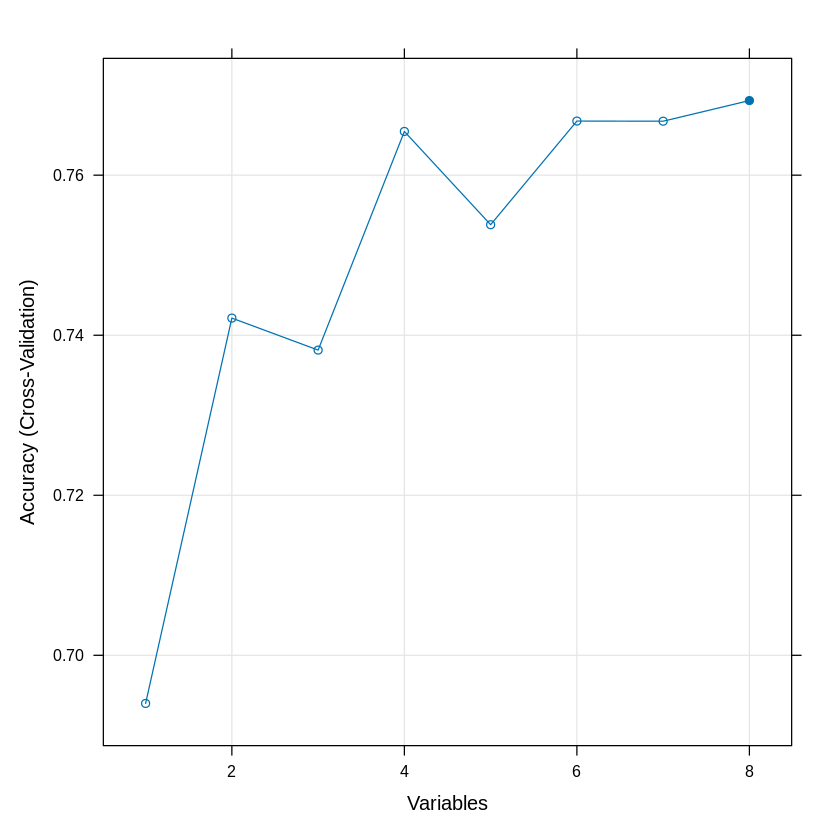

In [20]:
plot(results, type = c("g", "o"))

+ Regularization : 특정 제약항을 추가함으로써 일반화의 성질을 좋게 하는 목적으로 사용하며 정보는 주로 벌점의 형태로 주어짐

### 6.5 예제 : {caret}을 이용한 기계학습
+ 절차 : 전처리 $\rightarrow$ 데이터분할 $\rightarrow$ 변수선택 $\rightarrow$ 모형적합 $\rightarrow$ 모수조율 $\rightarrow$ 변수중요도추정 $\rightarrow$ 예측 및 모형 평가

#### 예제 3.

In [21]:
# train = read.csv("loan.csv", encoding = "UTF-8")
# str(train)

##### (a) 전처리 1 - 결측값 대치, 표준화

In [22]:
# sum(is.na(train))

# library(mice)
# library(caret)
# md.pattern(train)

# prePro = preProcess(train, method = c("knnImpute", "center", "scale"))
# loanPre = predict(prePro, train)
# sum(is.na(loanPre))

+ md.pattern{mice} : 결측값의 패턴 확인
  + knnImpute방법 : knn 방법으로 결측치 대치(결측치 제거x)
  
##### (b) 전처리 2 - 범주형 예측변수 처리

In [23]:
# # 종속변수를 숫자형 변수로 변환(0, 1로 recoding)
# loanPre$Loan_Status = ifelse(loanPre$Loan_Status == "N", 0, 1)
# id = loanPre$Loan_ID
# loanPre$Loan_ID = NULL  # 1열(Loan_ID)은 제거하여 복잡성 줄임

# # 범주형 변수에 대해 더미변수를 생성
# dmy = dummyVars("~ .", data = loanPre, fullRank = T)
# loanDummy = data.frame(predict(dmy, newdata = loanPre))
# str(loanDummy)

# # 반응변수를 원래의 범주형으로 돌려줌
# loanDummy$Loan_Status = as.factor(loanDummy$Loan_Status)

+ dummyVars() : 범주형 예측변수에 대해 더미변수 생성
  + fullRank = TRUE 옵션 : (범주 수 - 1)개의 더미변수 생성
    + 역행렬이 계산되게 하려는 통계적 접근 방식
  + fullRank = FALSE 옵션 : (범주 수)개의 더미변수 생성
    + 요즘 많이 쓰는 방식
    
##### (c) 데이터 분할

In [24]:
# # 훈련용자료 75%, 검증용자료 25% 생성
# set.seed(101)
# index = createDataPartition(loanDummy$Loan_Status, p = 0.75, list = F)
# loanTrain = loanDummy[index,]
# loanTest = loanDummy[-index,]

+ set.seed() : 난수를 생성하는 프로그램에서 결과가 항상 다르게 나올 수 있는데 이 때 특정 결과의 재현성을 시행하기 위한 함수

##### (d) 변수 선택

In [25]:
# # rfe() 함수의 옵션 설정
# set.seed(102)
# control = rfeControl(functions = rfFuncs, method = "repeatedcv", repeats = 3, verbose = FALSE)
# outcomeName = "Loan_Status"
# predictors = names(loanTrain)[!names(loanTrain) %in% outcomeName]
# predictorProfile = rfe(loanTrain[, predictors], loanTrain[, outcomeName],
#                        rfeControl = control)
# predictorProfile
# names(predictorProfile)
# predictors = predictorProfile$optVariables

##### (e) 모형 적합

In [26]:
# {caret} 패키지에서 제공되는 알고리즘 확인
# names(getModelInfo())

# # 모형적합 예시
# set.seed(103)
# model_gbm = train(loanTrain[, predictors], loanTrain[, outcomeName], method = "gbm")
# model_rf = train(loanTrain[, predictors], loanTrain[, outcomeName], method = "rf")
# model_nnet = train(loanTrain[, predictors], loanTrain[, outcomeName], method = "nnet")
# model_glm = train(loanTrain[, predictors], loanTrain[, outcomeName], method = "glm")

+ getModelInfo() : {caret} 패키지에서 제공되는 알고리즘 확인

##### (f) 모수 조율 : (e)에 비해 시간-소모적임에 유의

In [27]:
# 모형의 성능 평가 방법을 지정 : 5-중첩 교차타당성 방법을 5회 반복
# fitControl = trainControl(method = "repeatedcv", number = 5, repeats = 5)

# # 1. tuneGrid() 함수를 이용한 모수 조율
# modelLookup(model = "gbm")
# grid = expand.grid(n.trees = c(10, 20, 50, 100, 500, 1000),
#                    shrinkage = c(0.01, 0.05, 0.1, 0.5),
#                    n.minobsinnode = c(3, 5, 10),
#                    interaction.depth = c(1, 5, 10))

# set.seed(104)
# model_gbm_1 = train(loanTrain[, predictors], loanTrain[, outcomeName],
#                     method = "gbm", trControl = fitControl, tuneGrid = grid)
# plot(model_gbm_1)

# # 2. tuneLength() 함수를 이용한 모수 조율
# set.seed(105)
# model_gbm_2 = train(loanTrain[, predictors], loanTrain[, outcomeName],
#                     method = "gbm", trControl = fitControl, tuneLength = 10)
# plot(model_gbm_2)


+ tuneGrid() : expand.grid()에서 지정한 모든 모수 조합에 대해 모형적합과 모형평가를 수행하여 최적의 모수 집합을 찾음
+ tuneLength() : 각 모수에 대해 값을 지정하는 대신 각 모수별로 고려해야 할 모수 값의 개수(길이)를 지정

##### (g) 변수 중요도 추정

In [28]:
# library(gbm)
# varImp(object = model_gbm)
# plot(varImp(object = model_gbm), main = "GBM - Variable Importance")

# varImP(object = model_rf)
# plot(varImp(object = model_rf), main = "RF - Variable Importance")

# varImP(object = model_nnet)
# plot(varImp(object = model_nnet), main = "NNET - Variable Importance")

# varImP(object = model_glm)
# plot(varImp(object = model_glm), main = "GLM - Variable Importance")

##### (h) 예측 및 모형 평가

In [29]:
# predictions = predict.train(object = model, gbm, loanTest[, predictors], type = "raw")
# table(predictions)
# confusionMatrix(predictions, loanTest[, outcomeName])

+ predict.train() : 검증용 자료에 대한 예측 수행
  + type = "raw" : 예측 클래스 제공
  + type = "prob" : 각 클래스에 속할 확률 제공
+ confusionMatrix() : 검증용 자료에 대한 모형평가 결과 제공

+ caret 패키지의 장점

  1) 단독으로 거의 모든 지도학습 문제를 다룸

  2) 전처리에서 예측모델링까지의 전 과정을 통일된 방식으로 수행
  
  3) 문법 체계가 매우 단순함